# Install and import Dependencies

In [1]:
#Run only once per session
!pip install neuralprophet[live]

     |████████████████████████████████| 67 kB 3.6 MB/s 
     |████████████████████████████████| 165 kB 15.7 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [2]:
import pandas as pd
from neuralprophet import NeuralProphet

# Fetch and prepare dataset

In [3]:
dataset=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1604712,1620869,1636455,1651673,1666545,1680985,1694874,1714742,1731257,1746092,1763040,1778976,1800704,1817721,1843563,1859841,1876394,1899575,1914393,1930428,1958719,1975444,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208,2218137,2233287,2263053,2275727
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,467682,467682,467682,467682,468619,469452,469748,469748,469748,469748,469748,469748,471090,471414,471414,471414,471414,471414,472910,473302,473302,474234,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444,504992,504992,504992,524716
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10105,10109,10111,10115,10118,10123,10125,10126,10126,10127,10130,10138,10143,10146,10152,10159,10178,10197,10197,10208,10220,10233,10233,10233,10252,10352,10408,10449,10507,10585,10585,1058

 The data has some columns in the 'Province/State' column that should be combined into one country's column.
 Also need to drop Lat and Long column since they're not useful for this task.

In [4]:
dataset=dataset.groupby('Country/Region').sum()
dataset=dataset.drop(columns=['Lat','Long'])
dataset

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1604712,1620869,1636455,1651673,1666545,1680985,1694874,1714742,1731257,1746092,1763040,1778976,1800704,1817721,1843563,1859841,1876394,1899575,1914393,1930428,1958719,1975444,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208,2218137,2233287,2263053,2275727
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,467682,467682,467682,467682,468619,469452,469748,469748,469748,469748,469748,469748,471090,471414,471414,471414,471414,471414,472910,473302,473302,474234,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444,504992,504992,504992,524716
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10105,10109,10111,10115,10118,10123,10125,10126,10126,10127,10130,10138,10143,10146,10152,10159,10178,10197,10197,10208,10220,10233,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888,10942,10942,10942,11019


Rotate data so that Countries are column names and dates are just rows

In [37]:
dates=dataset.columns
dataset=dataset.transpose().reset_index(drop=True)
dates=pd.DataFrame(dates)
rotated_dataset= pd.concat([dates, dataset.diff()], axis=1, join='inner')
rotated_dataset=rotated_dataset.rename(columns={0:'Date'})
rotated_dataset

,Date,Date,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,486.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,669.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,736,312.0,1562.0,2130.0,0.0,89.0,82.0,77729.0,2556.0,66223.0,43053.0,3361.0,94.0,5255.0,15807.0,767.0,1974.0,68285.0,735.0,0.0,136.0,6587.0,2632.0,4842.0,229702.0,27.0,9874.0,0.0,168.0,95.0,52.0,34.0,0.0,31280.0,58.0,0.0,25792.0,252.0,17663.0,3.0,...,3.0,5469.0,17127.0,14227.0,79.0,0.0,4100.0,15.0,130888.0,2523.0,511.0,0.0,460.0,41791.0,44841.0,53.0,63.0,12.0,0.0,8450.0,15.0,31.0,0.0,804.0,9800.0,82180.0,443607.0,285.0,33104.0,2638.0,97165.0,9566.0,1117.0,0.0,1887.0,15727.0,7750.0,67.0,736.0,153.0
737,737,53.0,1549.0,1870.0,528.0,128.0,34.0,63884.0,3536.0,65980.0,38631.0,3564.0,43.0,6659.0,15440.0,729.0,2221.0,48201.0,693.0,0.0,205.0,0.0,2073.0,0.0,260806.0,87.0,9871.0,20.0,237.0,34.0,40.0,38.0,0.0,17688.0,0.0,0.0,29829.0,142.0,20946.0,3.0,...,1.0,5554.0,17027.0,16585.0,143.0,0.0,3789.0,8.0,118922.0,961.0,0.0,0.0,395.0,55180.0,39771.0,53.0,68.0,24.0,0.0,8618.0,0.0,17.0,0.0,768.0,8343.0,93586.0,642857.0,162.0,35164.0,2545.0,89316.0,13612.0,1186.0,0.0,1989.0,14929.0,4548.0,54.0,351.0,237.0
738,738,233.0,0.0,1742.0,0.0,28.0,0.0,41978.0,2594.0,47258.0,34748.0,4268.0,67.0,6708.0,10378.0,630.0,2302.0,0.0,0.0,0.0,136.0,5423.0,0.0,0.0,205597.0,52.0,5875.0,0.0,172.0,0.0,23.0,54.0,0.0,9867.0,0.0,0.0,31909.0,161.0,18450.0,2.0,...,3.0,5207.0,17808.0,15182.0,0.0,0.0,3342.0,4.0,0.0,982.0,0.0,0.0,219.0,0.0,0.0,54.0,47.0,0.0,0.0,0.0,14.0,0.0,0.0,1081.0,16519.0,94783.0,169002.0,82.0,38171.0,2355.0,72405.0,9222.0,1152.0,0.0,2364.0,15150.0,0.0,0.0,303.0,82.0
739,739,821.0,1615.0,1464.0,0.0,19.0,0.0,21570.0,2085.0,36719.0,27127.0,4943.0,26.0,6745.0,12183.0,512.0,2387.0,0.0,0.0,0.0,119.0,5100.0,0.0,0.0,104449.0,0.0,2602.0,0.0,174.0,0.0,19.0,57.0,0.0,8541.0,0.0,0.0,30131.0,124.0,16119.0,3.0,...,7.0,4498.0,15200.0,13865.0,0.0,0.0,2226.0,0.0,0.0,1056.0,0.

In [31]:
data=rotated_dataset[['Date','US']]
data.columns=['ds','y']
data=data.dropna()
data[1:]

,ds,y
2,1/24/20,1.0
3,1/25/20,0.0
4,1/26/20,3.0
5,1/27/20,0.0
6,1/28/20,0.0
...,...,...
736,1/27/22,443607.0
737,1/28/22,642857.0
738,1/29/22,169002.0
739,1/30/22,96887.0


In [32]:
m = NeuralProphet(daily_seasonality=True)
m.fit(data[1:],freq='D',epochs=1000)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)

INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16


  0%|          | 0/243 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.06E-01, min: 4.95E-01


  0%|          | 0/243 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.06E-01, min: 7.59E-01


  0%|          | 0/243 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.15E-01, min: 9.81E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.09E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [01:36<00:00, 10.39it/s, SmoothL1Loss=0.0272, MAE=3.5e+4, RMSE=5.8e+4, RegLoss=0]


,SmoothL1Loss,MAE,RMSE,RegLoss
0,0.864238,362164.603730,448614.776810,0.0
1,0.783487,336713.586434,421134.856563,0.0
2,0.724396,318337.185703,400068.163523,0.0
3,0.668299,300477.877019,379351.066253,0.0
4,0.613001,283459.291610,357572.512940,0.0
...,...,...,...,...
995,0.027208,35034.050448,59402.634359,0.0
996,0.027208,35035.825625,58315.879155,0.0
997,0.027206,35034.052438,58410.895689,0.0
998,0.027206,35032.274715,58097.548754,0.0


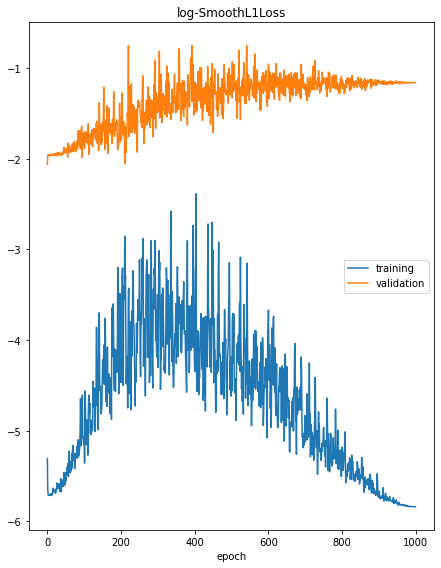

Epoch[1000/1000]: 100%|██████████| 1000/1000 [01:28<00:00, 11.35it/s, SmoothL1Loss=0.00291, MAE=1.28e+4, RMSE=2e+4, RegLoss=0, MAE_val=1.98e+5, RMSE_val=2.4e+5, SmoothL1Loss_val=0.313]


In [34]:
df_train, df_test = m.split_df(data[1:], freq='D')

metrics = m.fit(df_train, freq='D', epochs=1000, validation_df=df_test, plot_live_loss=True)

In [35]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
1999,0.002915,12793.577571,19995.325169,0.0,NaN,NaN,NaN


In [8]:
future=m.make_future_dataframe(data,periods=14)
forecast=m.predict(future)
forecast

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
0,2022-02-01,None,582727.00000,NaN,509197.46875,171113.187500,4273.432617,-101857.101562
1,2022-02-02,None,585876.87500,NaN,510756.59375,165195.359375,11782.040039,-101857.101562
2,2022-02-03,None,579434.31250,NaN,512315.43750,159209.937500,9766.011719,-101857.101562
3,2022-02-04,None,588880.43750,NaN,513874.28125,153201.546875,23661.697266,-101857.101562
4,2022-02-05,None,534163.25000,NaN,515433.15625,147213.578125,-26626.388672,-101857.101562
5,2022-02-06,None,521222.12500,NaN,516992.28125,141287.671875,-35200.707031,-101857.101562
6,2022-02-07,None,564501.25000,NaN,518551.12500,135463.343750,12343.916016,-101857.101562
7,2022-02-08,None,552304.43750,NaN,520109.96875,129778.093750,4273.432617,-101857.101562
8,2022-02-09,None,555860.68750,NaN,521668.96875,124266.765625,11782.040039,-101857.101562
9,2022-02-10,None,550098.37500,NaN,523227.93750,118961.546875,9766.011719,-101857.101562


In [25]:
results_df=forecast[['ds','yhat1']]
results_df['yhat1']=forecast['yhat1'].astype(int)
results_df.columns=['Date','Predicted Cases']
results_df

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



,Date,Predicted Cases
0,2022-02-01,582727
1,2022-02-02,585876
2,2022-02-03,579434
3,2022-02-04,588880
4,2022-02-05,534163
5,2022-02-06,521222
6,2022-02-07,564501
7,2022-02-08,552304
8,2022-02-09,555860
9,2022-02-10,550098


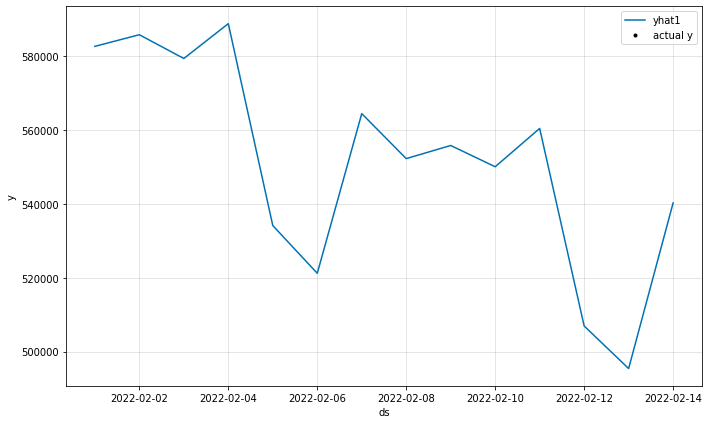

In [10]:
fig1 = m.plot(forecast)